# KNN (K-Nearest Neighbors) Classifier

## Inroduction

KNN is a supervised classification algorithm.

the KNN algorithm is :

for new point $x$ :
1. choose $k$ - number of closest neighbors, (predicttion is based on $k$).
1. calculate the distance from $x$ to all points
2. sort points by distnace from $x$ in ascending order.
3. predict the majority label of the $k$ closest points.

![alt text](./knn.png "title")


as we can see :

> if we will choose $k=3$, then for the new point $?$, the predicted class will be B.

> if we will choose $k=7$, then for the new point $?$, the predicted class will be A.

## Predictions and Evaluations

let start explore the data from the file ```KNN.csv```

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### get the data

In [2]:
df = pd.read_csv('KNN.csv')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


### EDA (Exploratory data analysis)

In [4]:
sns.set(style="ticks", color_codes=True)

In [5]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


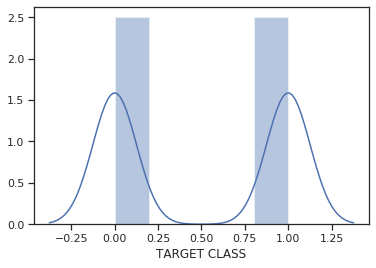

In [6]:
sns.distplot(df['TARGET CLASS'])

let's check if there is any missing value

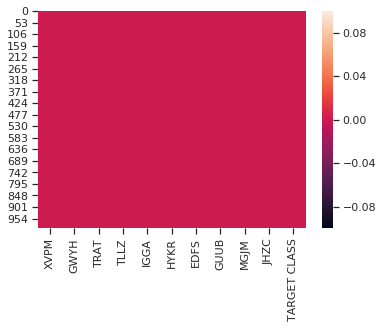

In [7]:
sns.heatmap(df.isnull())

we can see that the heatmap is clean, no missing value

### Standardize the Variables

> because KNN is relies on majority based class of $k$ nearest points, it is better to scale data, using standart scaler.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
features = df.drop('TARGET CLASS', axis=1)

scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(features)

In [12]:
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [13]:
y = df['TARGET CLASS']

### Train and Split

In [29]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90)

### KNN prediction

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)

In [53]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [54]:
predictions = knn.predict(X_test)

### Evaluation

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       146
           1       0.72      0.75      0.73       154

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



we can see that accuracy is $0.72$

### chosing $k$ value

In [57]:
error_rates = []
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error_rates.append(np.mean(pred_i != y_test))

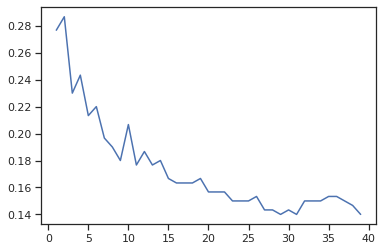

In [58]:
sns.lineplot(x=range(1,40), y=error_rates)

In [59]:
np.argmin(error_rates)

28

 we can see that the best $k$ with the minimum error rate is 28.

### Repeat prediction with $k=28$

In [60]:
knn = KNeighborsClassifier(n_neighbors=28)

In [61]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

In [62]:
predictions = knn.predict(X_test)

In [63]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       146
           1       0.85      0.88      0.86       154

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



with $k=28$, the accuracy is $0.86$. 